In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL.Image as Image
# i prefer PIL to draw the text, more beautiful
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

In [2]:
# http://www.workwithcolor.com/green-color-hue-range-01.htm
color_def = {0:'green',1:'yellow',2:'red'}
def select_traffic_light(image): 
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # green color mask
    lower = np.array([40, 50, 60])
    upper = np.array([70, 255, 255])
    green_mask = cv2.inRange(hsv, lower, upper)
    # yellow color mask
    lower = np.array([20, 100, 100])
    upper = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower, upper)
    # red color mask
    lower_red = np.array([0,70,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)
    # red upper mask (170-180)
    lower_red = np.array([170,70,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    red_mask = mask0+mask1
    
    # combine the mask
    green_yellow_mask = cv2.bitwise_or(green_mask, yellow_mask)
    green_yellow_red_mask = cv2.bitwise_or(green_yellow_mask, red_mask)
    masked = cv2.bitwise_and(image, image, mask = green_yellow_red_mask)
    
    img_pred = cv2.addWeighted(masked,1.0,image,0.2, 0)
    array_colors = [np.mean(green_mask),np.mean(yellow_mask),np.mean(red_mask)]
    print(array_colors)
    color_detected = color_def[np.argmax(array_colors)]
    
    pil_image = Image.fromarray(np.uint8(img_pred))
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.truetype('Roboto-Regular.ttf', 30)
    draw.text((10,10),'color detected: '+color_detected,fill='white',font=font)
    
    return np.array(pil_image)

[22.207950785833482, 0.17199374356767821, 0.5782548275120215]


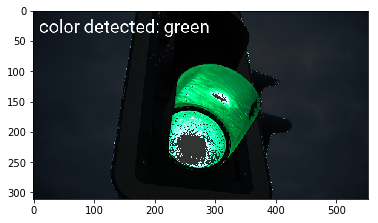

In [3]:
traffic = cv2.cvtColor(cv2.imread('green-traffic-light-2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

[2.3029556650246303, 0.005815544608648057, 0.01412346547814528]


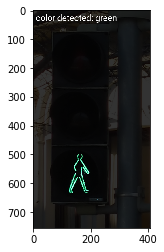

In [4]:
traffic = cv2.cvtColor(cv2.imread('green-traffic-light.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

[0.0014778239477024183, 23.914147121720536, 0.0014778239477024183]


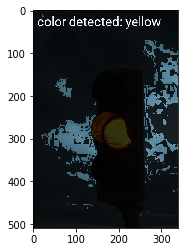

In [5]:
traffic = cv2.cvtColor(cv2.imread('yellow-traffic-light.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

[0.0108603066439523, 0.017771410871921946, 0.07898404831965308]


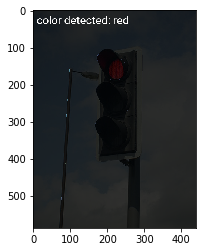

In [6]:
traffic = cv2.cvtColor(cv2.imread('red-traffic-light.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

[0.0062074001947419665, 0.06766066212268744, 118.43098831548198]


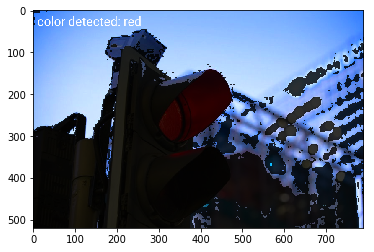

In [7]:
traffic = cv2.cvtColor(cv2.imread('red.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()

[22.207950785833482, 0.17199374356767821, 0.5782548275120215]
[0.0014778239477024183, 23.914147121720536, 0.0014778239477024183]
[0.0062074001947419665, 0.06766066212268744, 118.43098831548198]


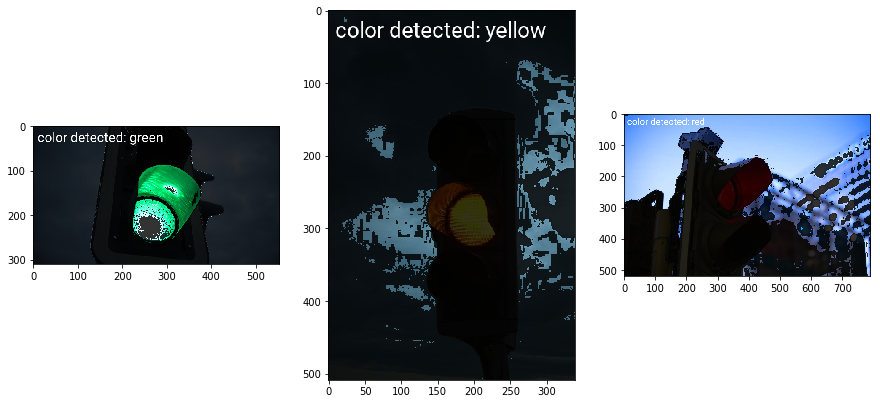

In [8]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
traffic = cv2.cvtColor(cv2.imread('green-traffic-light-2.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.subplot(1, 3, 2)
traffic = cv2.cvtColor(cv2.imread('yellow-traffic-light.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.subplot(1, 3, 3)
traffic = cv2.cvtColor(cv2.imread('red.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(select_traffic_light(traffic))
plt.show()